# Homework 3
### Optimization via Gradient Descent.
Here goes the text of the problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Backtracking and GD definition
`Note:` the backtracking and GD function have been modified by Leonardo Chiarioni™ introducing a new parameter: **multivariate**

In [79]:
def backtracking(f, grad_f, x, multivariate):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    multivariate: boolean. Indicate whether the function f 
    is multivariate or not.
    """

    if multivariate:
        norm = np.linalg.norm
    else:
        norm = np.abs
        
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha



def GD(f, grad_f, x0, kmax, tolf, tolx, back_tracking=False, alpha=1, multivariate=True):
    """
    This function implements the Gradient Descent algorithm.
    """
    if multivariate:
        norm = np.linalg.norm
    else:
        norm = np.abs
    
    # Initialize x_k
    x_k = x0
    
    # counter
    k = 0
    
    # Initialize the outputs
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [norm(grad_f(x0))]
    
    # Loop
    condition = True
    while condition:
        # Update alpha
        if back_tracking:
            alpha = backtracking(f, grad_f, x_k, multivariate)
        # Update x
        x_k = x_k - alpha*grad_f(x_k)
        
        # Update outputs
        x.append(x_k)
        f_val.append(f(x_k))
        grads.append(grad_f(x_k))
        err.append(norm(grad_f(x_k)))
        
        # check criteria
        condition1 = norm(grad_f(x_k)) > (tolf * norm(grad_f(x0)))
        condition2 = norm(x_k) > tolx
        condition3 = k < kmax
        condition = condition1 and condition2 and condition3
       
        # update k
        k += 1
            
    return x_k, k, np.array(x), np.array(f_val), np.array(grads), np.array(err)

def plot_error(xsol, k, err, figsize=(8,4)):
    """
    This function enables you to simply plot the error 
    of the gradient descent with respect to the iteration k
    """
    print(f'x = {x_sol}')
    print(f"k: {k}")
    print(f'error: {err[k]}')
    
    plt.figure(figsize=figsize)
    plt.plot(np.arange(1,k+2,1), err, 'r-')
    plt.xlabel('k-th iteration')
    plt.ylabel('Error (||\u2207ƒ||_2)')
    plt.title('Error for different k')
    plt.grid()
    plt.show()

### Function 1:
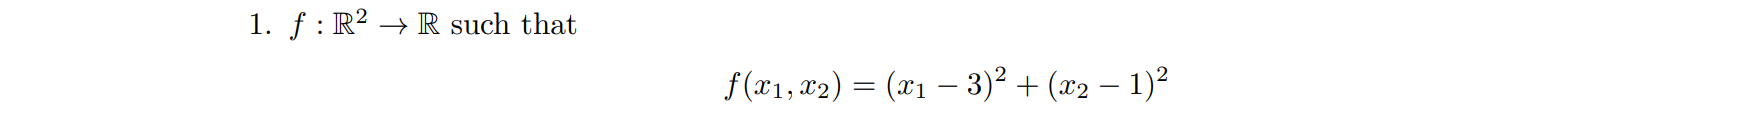

In [4]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1 - 3), 2*(x2 - 1)])

Backtracking = True, convergence in 87 iterations

x = [2.99997297 0.99999099]
k: 87
error: 5.698107109779695e-05


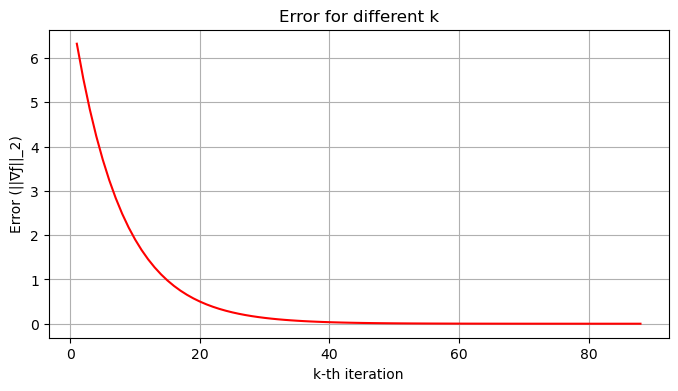

In [40]:
x0 = np.array([0,0])
kmax = 1_00
tolf = tolx = 1e-5

x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, back_tracking=True)
plot_error(x_sol, k, err)

Backtracking = False, high learning rate: **Divergence!**

x = [2.98144711e+08 9.93815704e+07]
k: 101
error: 628544233.6592741


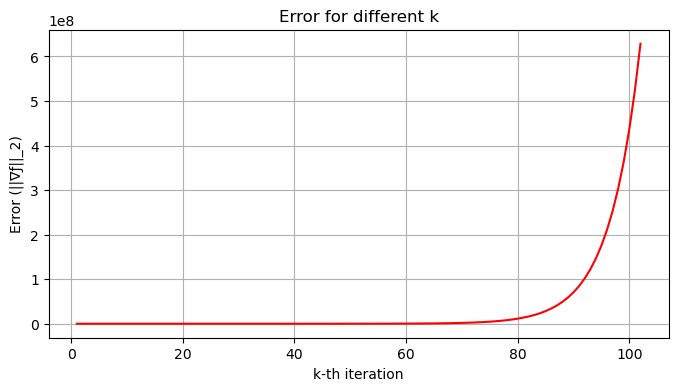

In [42]:
x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, alpha=1.1)
plot_error(x_sol, k, err)

Backtracking = False, correct learning rate: just **1 iteration!**

x = [3. 1.]
k: 1
error: 0.0


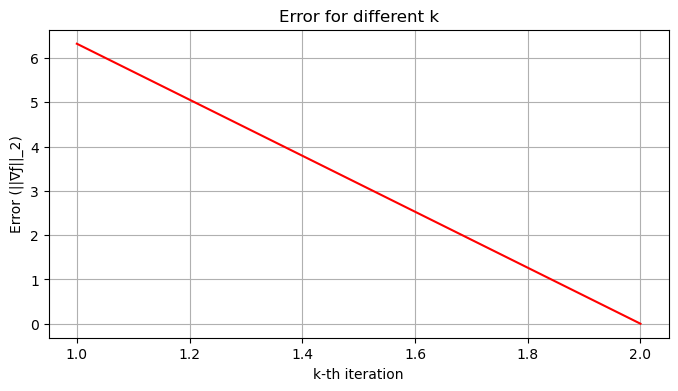

In [37]:
x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, alpha=0.5)
plot_error(x_sol, k, err)

In [ ]:
x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, back_tracking=False)
plot_error(x_sol, k, err)

# Function 2:
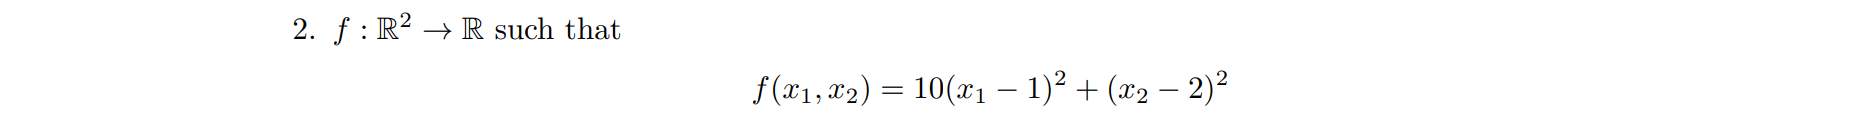
Here backtracking is almost essential to avoid divergence (overflow in this case) unless you choose a very small step size.
Backtracking allows you to find the solution with a few iterations

In [43]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1-1), 2*(x2 - 2)])

x = [1.         1.99990644]
k: 80
error: 0.00018712416290789236


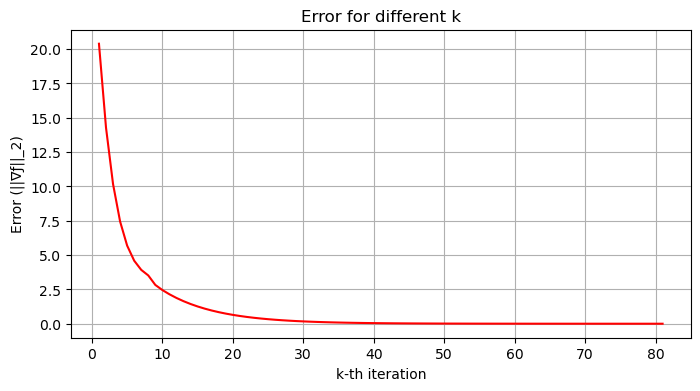

In [47]:
x0 = np.array([0,0])
kmax = 1_00
tolf = tolx = 1e-5

x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, back_tracking=True)
plot_error(x_sol, k, err)

### Function 3:
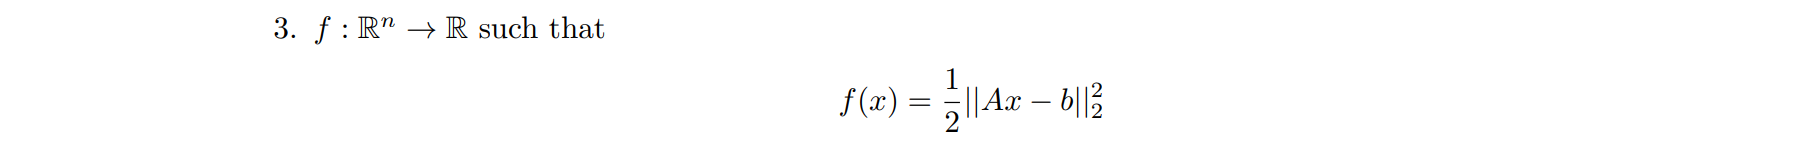
Backtracking is superslow with this function. Experimentally, a step-size greater than about 0.22 leads to divergence. A step size of 0.2 enables us to reach an optimal solution in 200 iterations.

In [52]:
def f(x):
    n = x.shape[0]
    v = np.linspace(0,1,n)
    x_true = np.ones((n,))
    A = np.vander(v, increasing=True)
    b = A @ x_true
    return 0.5*np.linalg.norm(A@x_true-b)**2

def grad_f(x):
    n = x.shape[0]
    v = np.linspace(0,1,n)
    x_true = np.ones((n,))
    A = np.vander(v, increasing=True)
    b = A @ x_true
    return A.T@(A@x-b)

x = [1.08809647 1.04216717 0.96484371 0.91038928 0.87177323]
k: 1001
error: 0.24078424241395305


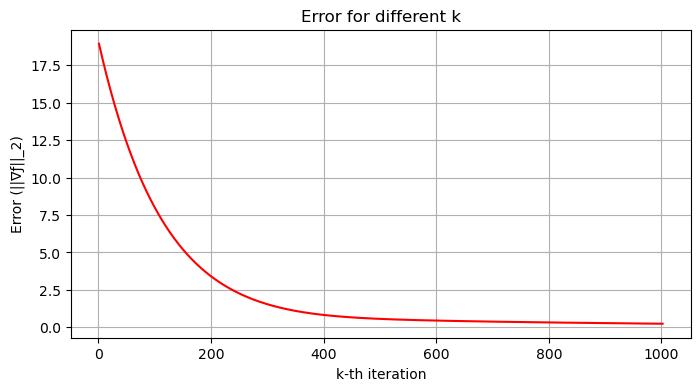

In [64]:
x0 = np.zeros(5)
kmax = 1_000
tolf = tolx = 1e-5

x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, back_tracking=True, multivariate=True)
plot_error(x_sol, k, err)

x = [0.99984951 0.99759521 1.00669687 1.00182628 0.99372073]
k: 202
error: 0.0001892211822669669


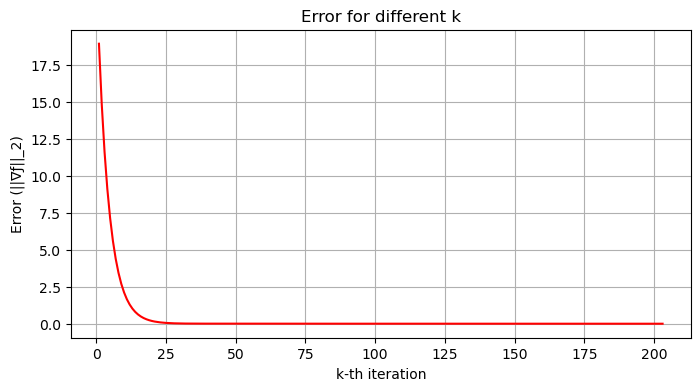

In [65]:
x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, alpha=0.2, multivariate=True)
plot_error(x_sol, k, err)

### Function 4:
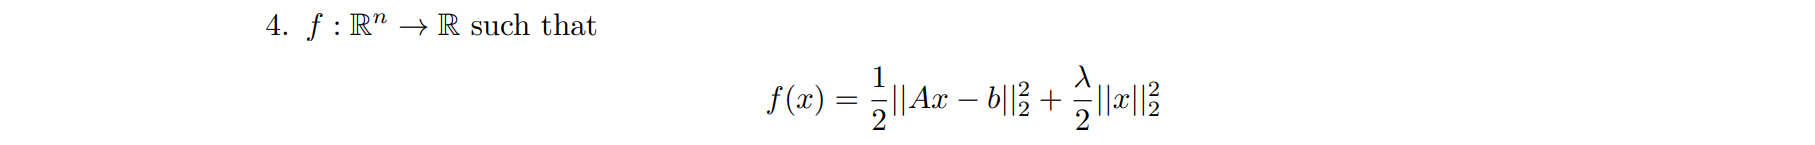
Backtracking doesn't allow convergence here (high error at the end). A step-size greater than about 0.2 leads to divergence

In [68]:
l = 0.5
def f(x):
    n = x.shape[0]
    v = np.linspace(0,1,n)
    x_true = np.ones((n,))
    A = np.vander(v, increasing=True)
    b = A @ x_true
    return 0.5*np.linalg.norm(A@x_true-b)**2 + 0.5*l*np.linalg.norm(x)**2

def grad_f(x):
    n = x.shape[0]
    v = np.linspace(0,1,n)
    x_true = np.ones((n,))
    A = np.vander(v, increasing=True)
    b = A @ x_true
    return A.T@(A@x-b) + l*x

x = [1.02331498 0.9828142  0.91717621 0.86991013 0.83596606]
k: 94
error: 0.0001741027221596313


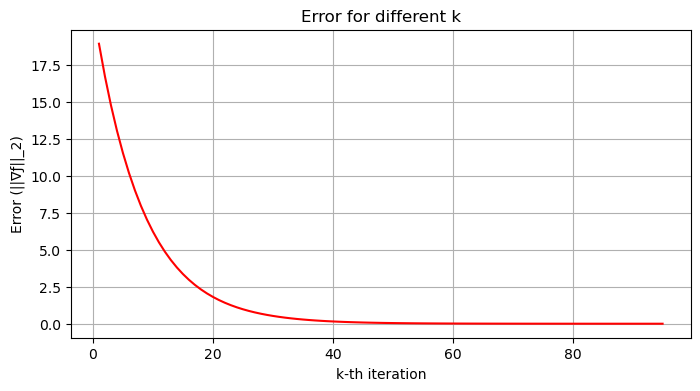

In [70]:
x0 = np.zeros(5)
kmax = 1_00
tolf = tolx = 1e-5

x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, alpha=0.2, multivariate=True)
plot_error(x_sol, k, err)

### Function 5:
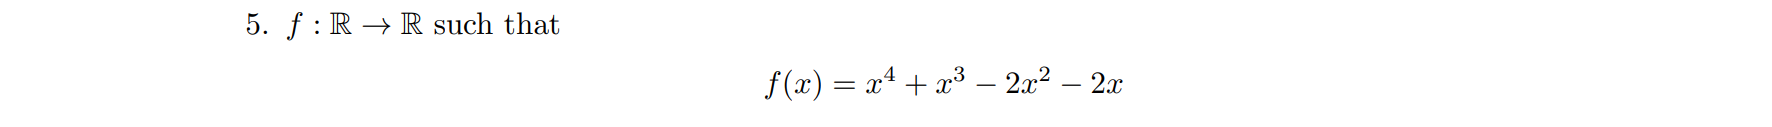
Backtracking is useful to avoid non optimal solution or even divergence, unless a very tiny step-size is used. If the starting point is towards the negative side, the other (local) minimum will be found.

In [73]:
def f(x):
    return x**4 + x**3 -2*x**2 -2*x

def grad_f(x):
    return 4*x**3 + 3*x**2 + -4*x -2

x = 0.922223172080442
k: 63
error: 1.9027681881222946e-05


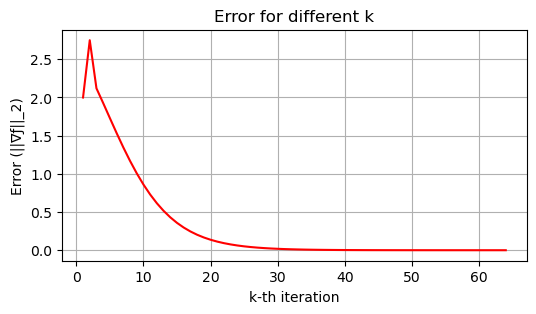

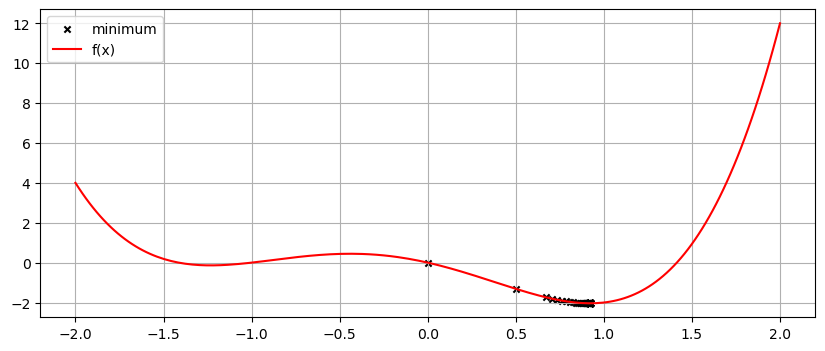

In [88]:
x0 = 0
kmax = 1_00
tolf = tolx = 1e-5

x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, back_tracking=True, multivariate=False)
plot_error(x_sol, k, err, figsize=(6,3))

a,b = -2, 2
x_val = np.linspace(a,b,200)
plt.figure(figsize=(10,4))
plt.scatter(x, f(x), c='black', marker='x', s=20, label='minimum')
plt.plot(x_val, f(x_val), 'r-', label='f(x)')
plt.grid()
plt.legend()
plt.show()

x = -1.232239115439945
k: 101
error: 3.4354306714945437e-06


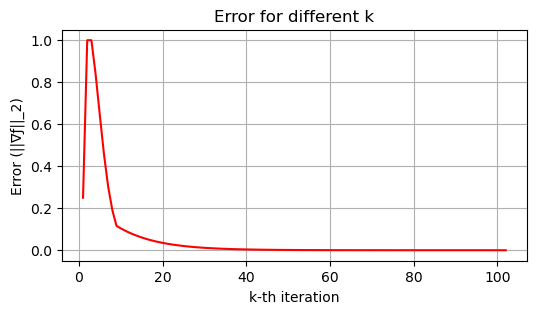

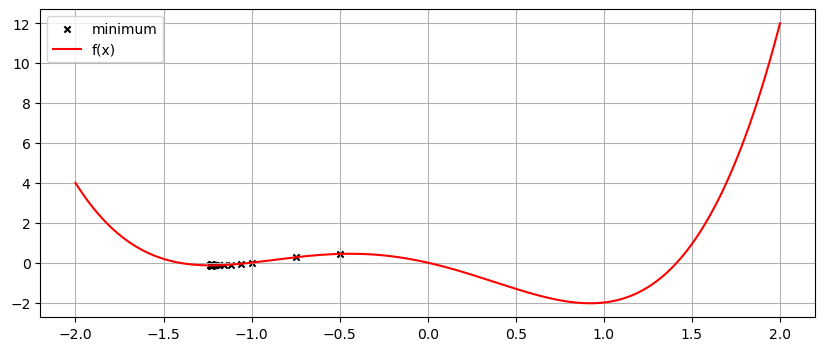

In [87]:
x0 = -0.5

x_sol, k, x, f_val, grads, err = GD(f, grad_f, x0, kmax, tolf, tolx, back_tracking=True, multivariate=False)
plot_error(x_sol, k, err, figsize=(6,3))

a,b = -2, 2
x_val = np.linspace(a,b,200)
plt.figure(figsize=(10,4))
plt.scatter(x, f(x), c='black', marker='x', s=20, label='minimum')
plt.plot(x_val, f(x_val), 'r-', label='f(x)')
plt.grid()
plt.legend()
plt.show()